In [1]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score, v_measure_score
from sklearn import datasets
import csv

import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

In [3]:
with open('../data/winequality_red.csv', 'r') as f:
    reader = csv.reader(f)
    wine_quality_dataset = list(reader)

del wine_quality_dataset[0]
    
wine_quality_dataset_labels = np.array([int(sublist[-1]) for sublist in wine_quality_dataset])
wine_quality_dataset = [[float(numStr) if numStr else 0 for numStr in sublist[:-1]] for sublist in wine_quality_dataset]
wine_quality_dataset = np.array(wine_quality_dataset)

ClusterUtils.visualize_sample_data(wine_quality_dataset)
X = wine_quality_dataset
y_true = wine_quality_dataset_labels
print(wine_quality_dataset.shape)
print(wine_quality_dataset[:5])

PermissionError: [Errno 13] Permission denied: '../data/winequality_red.csv'

### Test with Parallel Runs

In [26]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=[],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                #else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                               else v_measure_score(labels_true=y_true, \
                                                                    labels_pred=y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 30], Default: 5
    random_state___GaussianMixture, Type: UniformInteger, Range: [0, 9], Default: 0
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, Default: False
  Conditions:
    covariance_type___GaussianMixture | clustering_choice in {'GaussianMixture'}
    init_params___GaussianMixture | clustering_choice in {'GaussianMixture'}
    n_components___GaussianMixture | clustering_choice in {'GaussianMixture'}
    random_state___GaussianMixture | clustering_choice in {'GaussianMixture'}
    warm_start___GaussianMixture | clustering_choice in {'Ga

Fitting configuration: {'n_components___GaussianMixture': 18, 'random_state___GaussianMixture': 4, 'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'spherical'}
Fitting configuration: {'random_state___GaussianMixture': 7, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'diag', 'n_components___GaussianMixture': 2, 'clustering_choice': 'GaussianMixture', 'warm_start___GaussianMixture': True}
Fitting configuration: {'n_components___GaussianMixture': 4, 'random_state___GaussianMixture': 7, 'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'spherical'}
Fitting configuration: {'n_components___GaussianMixture': 3, 'random_state___GaussianMixture': 9, 'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'full'}
Fitting configuration: {'random_state___Gaussia

Fitting configuration: {'random_state___GaussianMixture': 8, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'spherical', 'n_components___GaussianMixture': 8, 'clustering_choice': 'GaussianMixture', 'warm_start___GaussianMixture': True}
Fitting configuration: {'n_components___GaussianMixture': 24, 'random_state___GaussianMixture': 2, 'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag'}
Fitting configuration: {'n_components___GaussianMixture': 6, 'random_state___GaussianMixture': 9, 'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag'}
Fitting configuration: {'random_state___GaussianMixture': 4, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'spherical', 'n_components___GaussianMixture': 1, 'clustering_choice': 'GaussianMixture', 'warm_start___GaussianMixture': True}


Fitting configuration: {'n_components___GaussianMixture': 10, 'random_state___GaussianMixture': 8, 'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'spherical'}
Fitting configuration: {'random_state___GaussianMixture': 8, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'diag', 'n_components___GaussianMixture': 27, 'clustering_choice': 'GaussianMixture', 'warm_start___GaussianMixture': True}
Fitting configuration: {'random_state___GaussianMixture': 9, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'spherical', 'n_components___GaussianMixture': 4, 'clustering_choice': 'GaussianMixture', 'warm_start___GaussianMixture': True}
Fitting configuration: {'random_state___GaussianMixture': 8, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'spherical', 'n_components___GaussianMixture': 4, 'clustering_choice': 'GaussianMixture', 'wa

Fitting configuration: {'random_state___GaussianMixture': 9, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'full', 'n_components___GaussianMixture': 27, 'clustering_choice': 'GaussianMixture', 'warm_start___GaussianMixture': True}
Fitting configuration: {'n_components___GaussianMixture': 2, 'random_state___GaussianMixture': 1, 'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'diag'}
Fitting configuration: {'random_state___GaussianMixture': 1, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'diag', 'n_components___GaussianMixture': 2, 'clustering_choice': 'GaussianMixture', 'warm_start___GaussianMixture': True}
Fitting configuration: {'n_components___GaussianMixture': 2, 'random_state___GaussianMixture': 2, 'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'covariance_type___GaussianMixture': 'spherical'}
Fitting config

In [27]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'diag'
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 2
  random_state___GaussianMixture, Value: 7
  warm_start___GaussianMixture, Value: True

doing TSNE


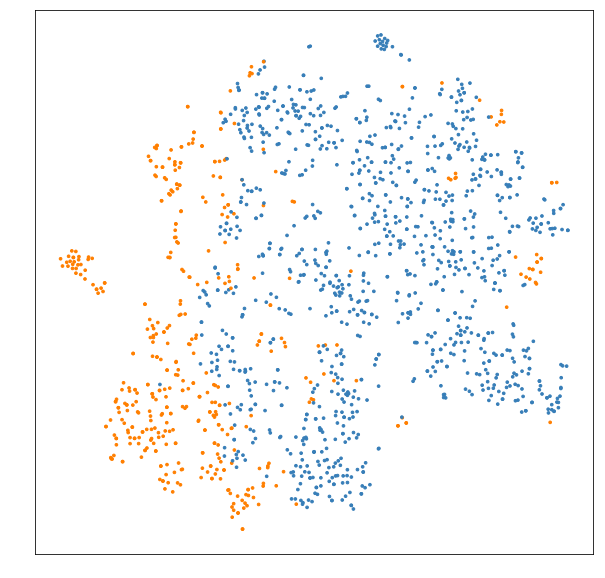

array([0, 1])

In [28]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [29]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   random_state___GaussianMixture, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00023508071899414062),
 TrajEntry(train_perf=-0.08127009116146852, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   random_state___GaussianMixture, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=1, ta_time_used=0.46283888816833496, wallclock_time=0.4734621047973633),
 TrajEntry(train_perf=-0.09227650101200455, incumbent_id=2, incumbent=Configuration:
   clustering_choice, Value: 'Gauss

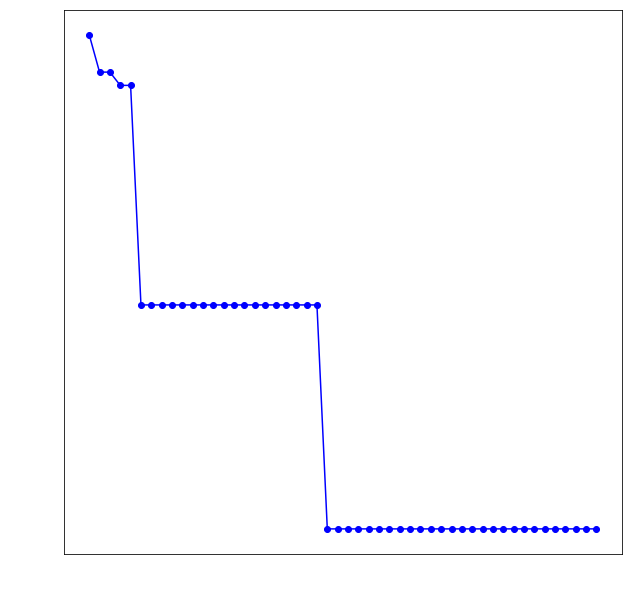

In [30]:
autocluster.plot_convergence()

In [34]:
print(type(predictions))
print(predictions.shape)
print(predictions[:100])

<class 'numpy.ndarray'>
(1599,)
[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0]


In [35]:
print(wine_quality_dataset_labels[:100])

[5 5 5 6 5 5 5 7 7 5 5 5 5 5 5 5 7 5 4 6 6 5 5 5 6 5 5 5 5 6 5 6 5 6 5 6 6
 7 4 5 5 4 6 5 5 4 5 5 5 5 5 6 6 5 6 5 5 5 5 6 5 5 7 5 5 5 5 5 5 6 6 5 5 4
 5 5 5 6 5 4 5 5 5 5 6 5 6 5 5 5 5 6 5 5 4 6 5 5 5 6]


In [36]:
print(v_measure_score(labels_true=wine_quality_dataset_labels, labels_pred=predictions))

0.008143213495023898
